In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import uniform
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm
import math 
from IPython.display import display, Math

## Задание 1

$S^2=\frac{1}{n}\sum_{i=1}^n(X_i-\overline{X})^2)$ - выборочная дисперсия, смещённая оценка.

$S_0^2=\frac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X})^2)$ - исправленная выборочная дисперсия, несмещённая оценка.

### Пуассон

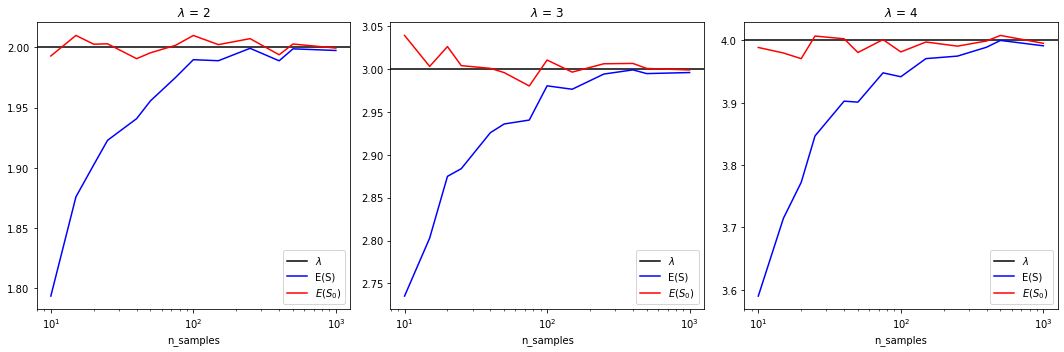

In [4]:
plt.figure(figsize=(15, 5))
plt.tight_layout()
ind = 1
for Lambda in tqdm.tqdm(range(2, 5, 1)):
    n_samples = [10, 15, 20, 25, 40, 50, 75, 100, 150, 250, 400, 500, 1000]
    S_n = []
    S_0_n = []
    y = []
    y_0 = []
    for n in n_samples:
        for i in range(2000):
            X = np.random.poisson(Lambda, n)
            S = sum((x-np.mean(X))**2 for x in X) 
            S_0 = S/(n-1)
            S /= n
            S_n.append(S)
            S_0_n.append(S_0)
        y.append(np.mean(S_n))
        y_0.append(np.mean(S_0_n))
        S_n, S_0_n = [], []
    plt.subplot(1, 3, ind)
    ind += 1
    plt.tight_layout()
    plt.axhline(y=Lambda, color='k', label='$\lambda$')
    plt.plot(n_samples, y, color='b', label='E(S)')
    plt.plot(n_samples, y_0, color='r', label='$E(S_0)$')
    plt.xscale('log')
    plt.xlabel('n_samples')
    plt.title('$\lambda$ = ' + str(Lambda))
    plt.legend()
plt.show()

### Нормальное

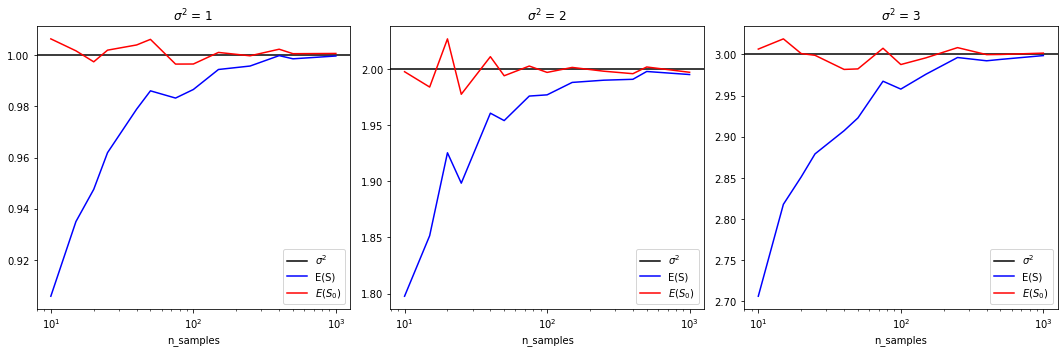

In [7]:
plt.figure(figsize=(15, 5))
plt.tight_layout()
ind = 1
for var in tqdm.tqdm([1, 2, 3]):
    n_samples = [10, 15, 20, 25, 40, 50, 75, 100, 150, 250, 400, 500, 1000]
    S_n = []
    S_0_n = []
    y = []
    y_0 = []
    for n in n_samples:
        for i in range(2000):
            X = np.random.normal(0, var**(1/2), n)
            S = sum((x-np.mean(X))**2 for x in X) 
            S_0 = S/(n-1)
            S /= n
            S_n.append(S)
            S_0_n.append(S_0)
        y.append(np.mean(S_n))
        y_0.append(np.mean(S_0_n))
        S_n, S_0_n = [], []
    plt.subplot(1, 3, ind)
    ind += 1
    plt.tight_layout()
    plt.axhline(y=var, color='k', label='$\sigma^2$')
    plt.plot(n_samples, y, color='b', label='E(S)')
    plt.plot(n_samples, y_0, color='r', label='$E(S_0)$')
    plt.xscale('log')
    plt.xlabel('n_samples')
    plt.title('$\sigma^2$ = ' + str(var))
    plt.legend()
plt.show()

### Равномерное

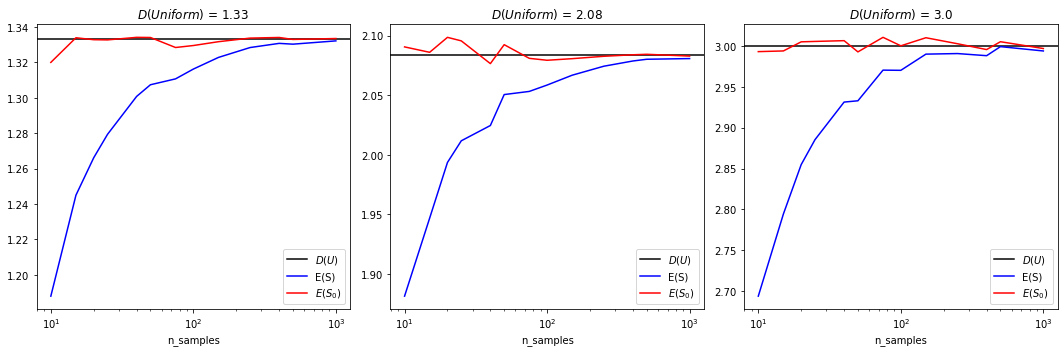

In [8]:
plt.figure(figsize=(15, 5))
plt.tight_layout()
ind = 1
for high in tqdm.tqdm([4, 5, 6]):
    n_samples = [10, 15, 20, 25, 40, 50, 75, 100, 150, 250, 400, 500, 1000]
    S_n = []
    S_0_n = []
    y = []
    y_0 = []
    for n in n_samples:
        for i in range(2000):
            X = np.random.uniform(0, high, n)
            S = sum((x-np.mean(X))**2 for x in X) 
            S_0 = S/(n-1)
            S /= n
            S_n.append(S)
            S_0_n.append(S_0)
        y.append(np.mean(S_n))
        y_0.append(np.mean(S_0_n))
        S_n, S_0_n = [], []
    plt.subplot(1, 3, ind)
    ind += 1
    plt.tight_layout()
    plt.axhline(y=(high**2)/12, color='k', label='$D(U)$')
    plt.plot(n_samples, y, color='b', label='E(S)')
    plt.plot(n_samples, y_0, color='r', label='$E(S_0)$')
    plt.xscale('log')
    plt.xlabel('n_samples')
    plt.title('$D(Uniform)$ = ' + str(round(((high**2)/12), 2)))
    plt.legend()
plt.show()

Из графиков видно смещение оценки $S$ при небольших(до 100) объёмах выборки.

Так как оценка $S$ является асимптотически несмещённой, то при $n\to\infty$ она также стремится к истинному значению.

## Задание 2

Доверительный интервал $(\overline{X}(1+\frac{z_{1-\varepsilon/2}\sqrt{1-\frac{1}{\overline{X}}}}{\sqrt{n}}))^{-1}<p<(\overline{X}(1-\frac{z_{1-\varepsilon/2}\sqrt{1-\frac{1}{\overline{X}}}}{\sqrt{n}}))^{-1}$, где $z_{1-\varepsilon/2}$ - квантиль стандартного нормального распределния.

In [52]:
q_dict = {0.90 : 1.65,
          0.95 : 1.95,
          0.99 : 2.60}

for p in tqdm.tqdm([0.2, 0.5, 0.8]):
    for q in q_dict.keys():
        p_0 = []
        n = 5000
        hit = 0
        n_it = 1000
        for it in range(n_it):
            X = np.random.geometric(p, n)
            mean_x = np.mean(X)
            bottom = (mean_x*(1+(q_dict[q]*math.sqrt(1-1/mean_x))/math.sqrt(n)))**(-1)
            upper = (mean_x*(1-(q_dict[q]*math.sqrt(1-1/mean_x))/math.sqrt(n)))**(-1)
            if bottom < p < upper:
                hit += 1
        display(Math(f'p = {p}; 1-\epsilon = {q}, Prob = {hit/n_it}'))    

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Как видно, для выборки размера $n=5000$ доверительный интервал накрывает параметр $p$ с нужной вероятностью в пределах погрешности около 1%.

## Задание 3

### Нормальное

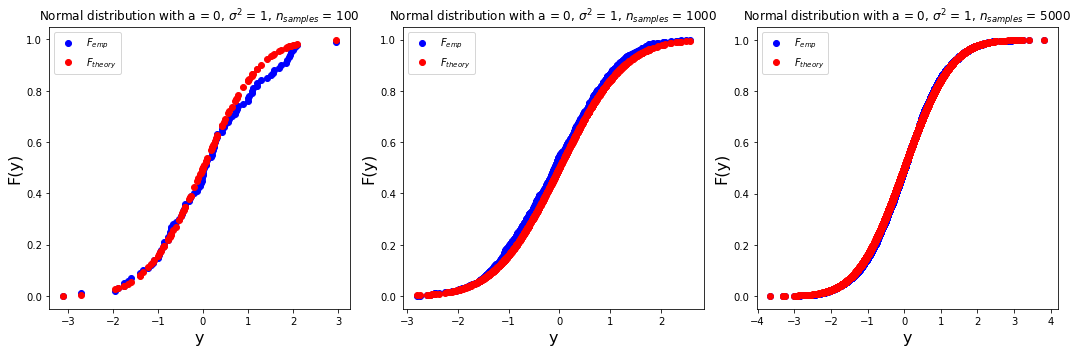

In [29]:
plt.figure(figsize=(15, 5))
plt.tight_layout()
font = {'size': 16,
        }
ind = 1
n_samples = [100, 1000, 5000]
for var in tqdm.tqdm([1, 2, 4]):
    for n in n_samples:
        F_emp = []
        F_theory = []
        N_x = np.random.normal(0, var**(1/2), n)
        for x in N_x:
            F_emp.append(sum(1 for i in N_x if i < x)/n)
            F_theory.append(0.5*(1+math.erf(x/math.sqrt(2*var))))
        plt.subplot(1, 3, ind)
        ind += 1
        plt.tight_layout()
        plt.scatter(N_x, F_emp, color='b', label='$F_{emp}$')
        plt.scatter(N_x, F_theory, color='r', label='$F_{theory}$')
        plt.xlabel('y', fontdict=font)
        plt.ylabel('F(y)', fontdict=font)
        plt.title('Normal distribution with a = 0, ' + '$\sigma^2$ = ' + str(var) + ', $n_{samples}$ = ' + str(n))
        plt.legend()
    break
plt.show()

### Равномерное 

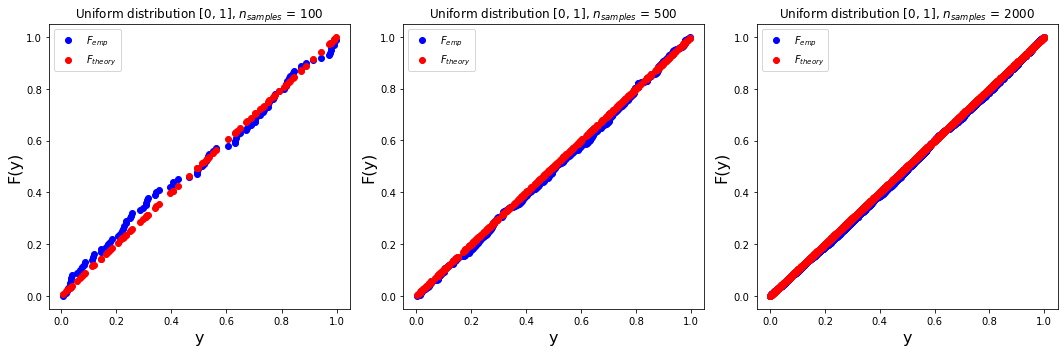

In [28]:
plt.figure(figsize=(15, 5))
font = {'size': 16,
        }
plt.tight_layout()
ind = 1
n_samples = [100, 500, 2000]
for high in tqdm.tqdm([1, 10, 50]):
    for n in n_samples:
        F_emp = []
        F_theory = []
        U_x = np.random.uniform(0, high, n)
        for x in U_x:
            F_emp.append(sum(1 for i in U_x if i < x)/n)
            F_theory.append(x/high)
        plt.subplot(1, 3, ind)
        ind += 1
        plt.tight_layout()
        plt.scatter(U_x, F_emp, color='b', label='$F_{emp}$')
        plt.scatter(U_x, F_theory, color='r', label='$F_{theory}$')
        plt.xlabel('y', fontdict=font)
        plt.ylabel('F(y)', fontdict=font)
        plt.title('Uniform distribution [0, ' + str(high) + '], ' + '$n_{samples}$ = ' + str(n))
        plt.legend()
    break
plt.show()

Как видно из графиков, оценка является состоятельной и несмещённой

$\textbf{D}(F_n^*(y))=\frac{F(y)(1-F(y))}{n}$ - дисперсия эмпирической функции распределения

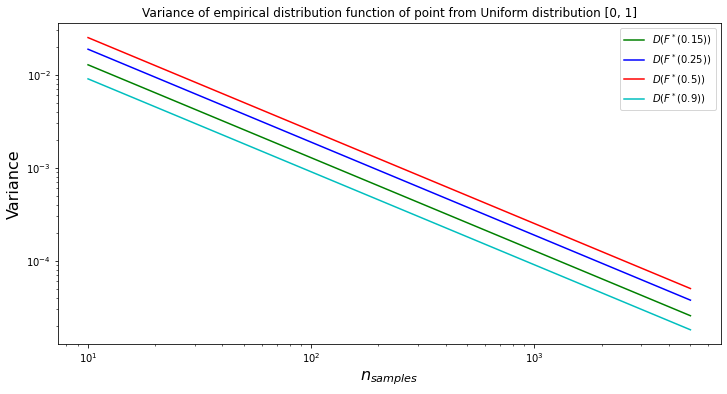

In [32]:
plt.figure(figsize=(10, 5))
plt.tight_layout()
ind = 1
n_samples = [10, 25, 50, 100, 150, 200, 300, 400, 500, 750, 1000, 2000, 2500, 3000, 5000]
X =  [0.15, 0.25, 0.5, 0.9] # fixed point
param = 1 # upper bound of Uniform distribution (bottom bound is 0)
colors = ['g', 'b', 'r', 'c']
font = {'size': 16,
        }
for ind, x in enumerate(X):
    D_emp_U = []
    for i, n in enumerate(n_samples):
        D_emp_U.append((x/param)*(1-x/param)/(n))
    plt.tight_layout()
    plt.plot(n_samples, D_emp_U, color=colors[ind], label=f'$D(F^*({x}))$')
plt.xlabel('$n_{samples}$', fontdict=font)
plt.ylabel('Variance', fontdict=font)
plt.title('Variance of empirical distribution function of point from Uniform distribution [0, 1]')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

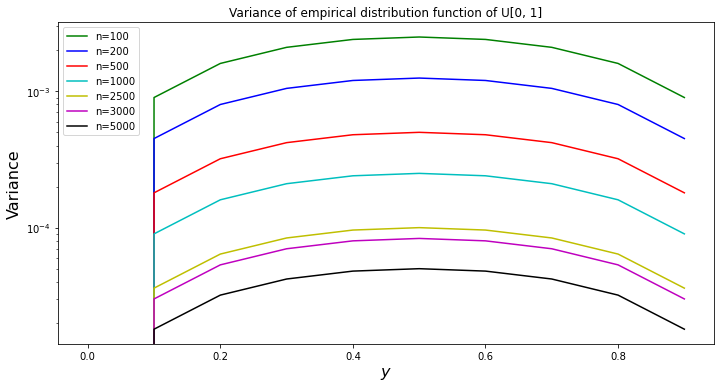

In [30]:
plt.figure(figsize=(10, 5))
plt.tight_layout()
ind = 1
n_samples = [100, 200, 500, 1000, 2500, 3000, 5000]
U_range = np.arange(0, 1, 0.1)
colors = ['g', 'b', 'r', 'c', 'y', 'm', 'k']
for i, n in enumerate(n_samples):
    D_emp_U = []
    for x in U_range:
        D_emp_U.append((x/param)*(1-x/param)/(n))
    plt.tight_layout()
    plt.plot(U_range, D_emp_U, color=colors[i], label='n=' + str(n))
plt.title('Variance of empirical distribution function of U[0, ' + str(1) + ']')
plt.yscale('log')
plt.xlabel('$y$', fontdict=font)
plt.ylabel('Variance', fontdict=font)
plt.legend()
plt.show()

Дисперсия линейно убывает с ростом числа элементов выборки. 